# DoS ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

from functions_ml import *
model_repo = ".\\DoS_system\\"
file_path = '.\Files\\DoS\\'

## Preprocessing data for binary classification (DoS (DDoS and DoS) or Benign)

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


## Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets + test_sets, X_columns)

## Define variables

In [4]:
performance_path = 'performance.csv'
local_path = '.\\DoS_system\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
X_columns = X_columns[:-2]
print(len(X_columns))

95
46


# Multiclass classification 

## Building model

In [21]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    # {
    #     "Name": "Cat",
    #     "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    # },
    # {
    #     "Name": "LIGHT",
    #     "Model": LGBMClassifier(random_state = 42)
    # },
    # {
    #     "Name": "GBoost",
    #     "Model": GradientBoostingClassifier(random_state = 42)
    # },
    # {
    #     "Name": "Adaboost",
    #     "Model": AdaBoostClassifier(random_state = 42)
    # },
]

['IAT', 'fin_flag_number', 'psh_flag_number', 'Min', 'syn_flag_number', 'UDP', 'ICMP', 'TCP', 'Magnitue', 'flow_duration', 'urg_count', 'Header_Length']


100%|██████████| 17/17 [00:17<00:00,  1.01s/it]


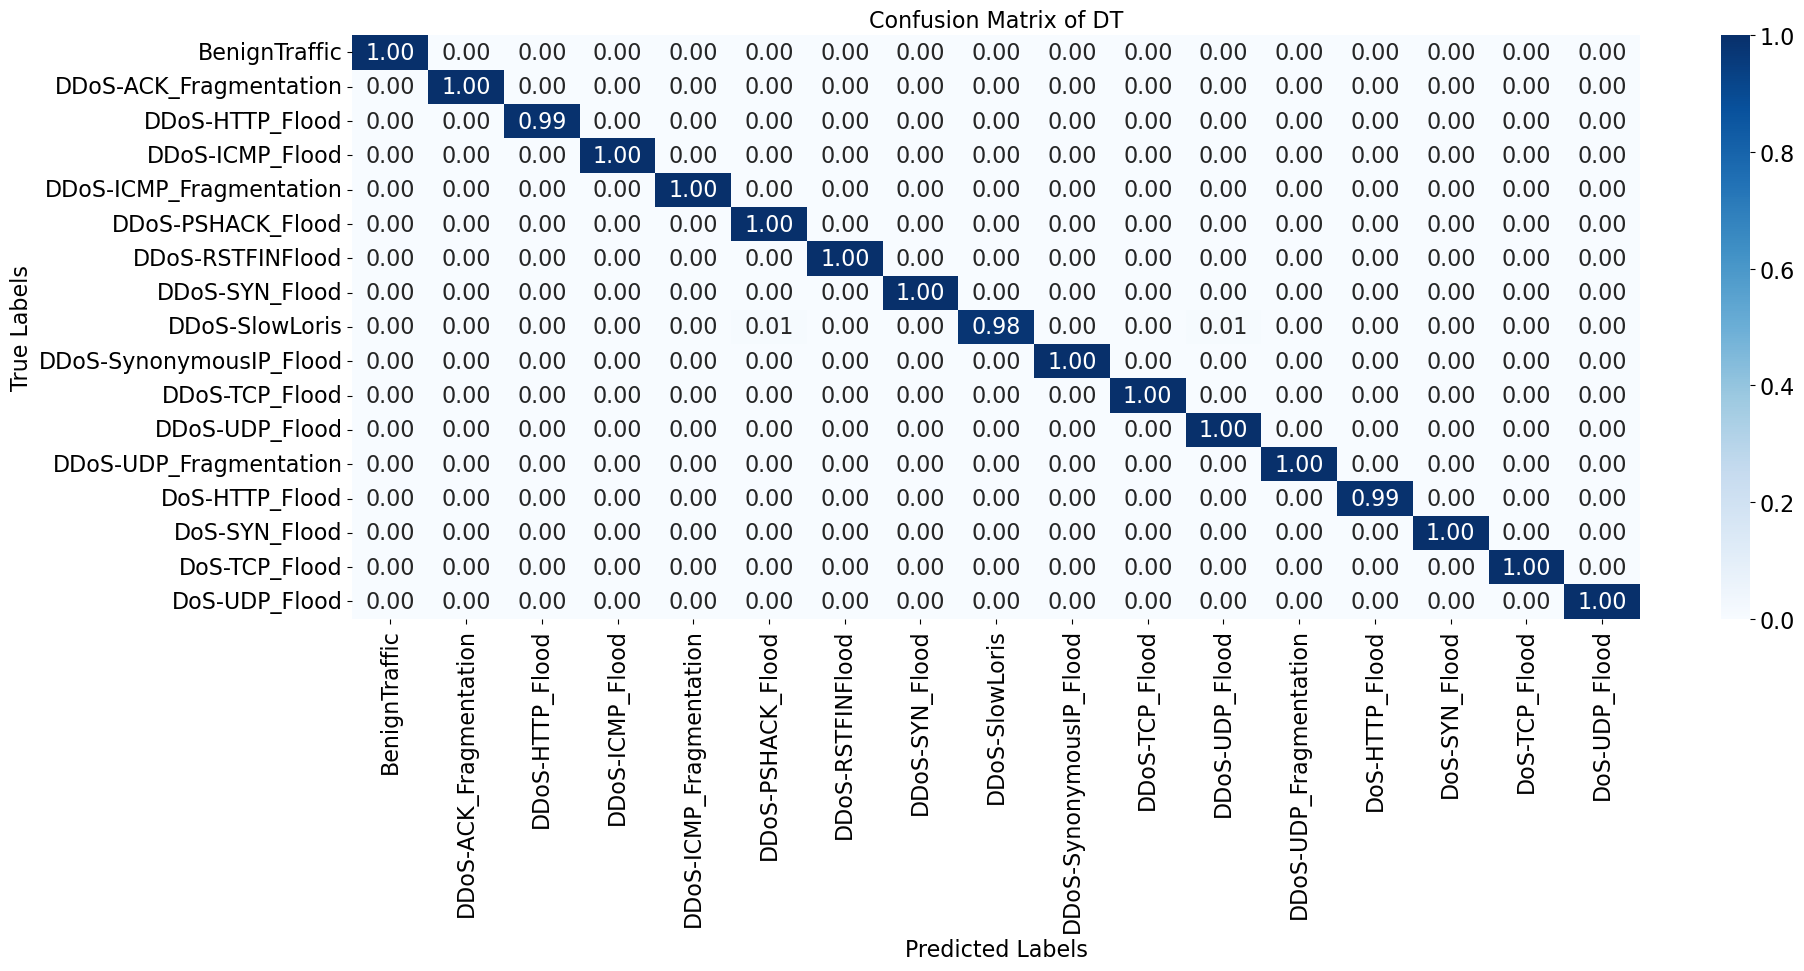

100%|██████████| 17/17 [00:17<00:00,  1.03s/it]


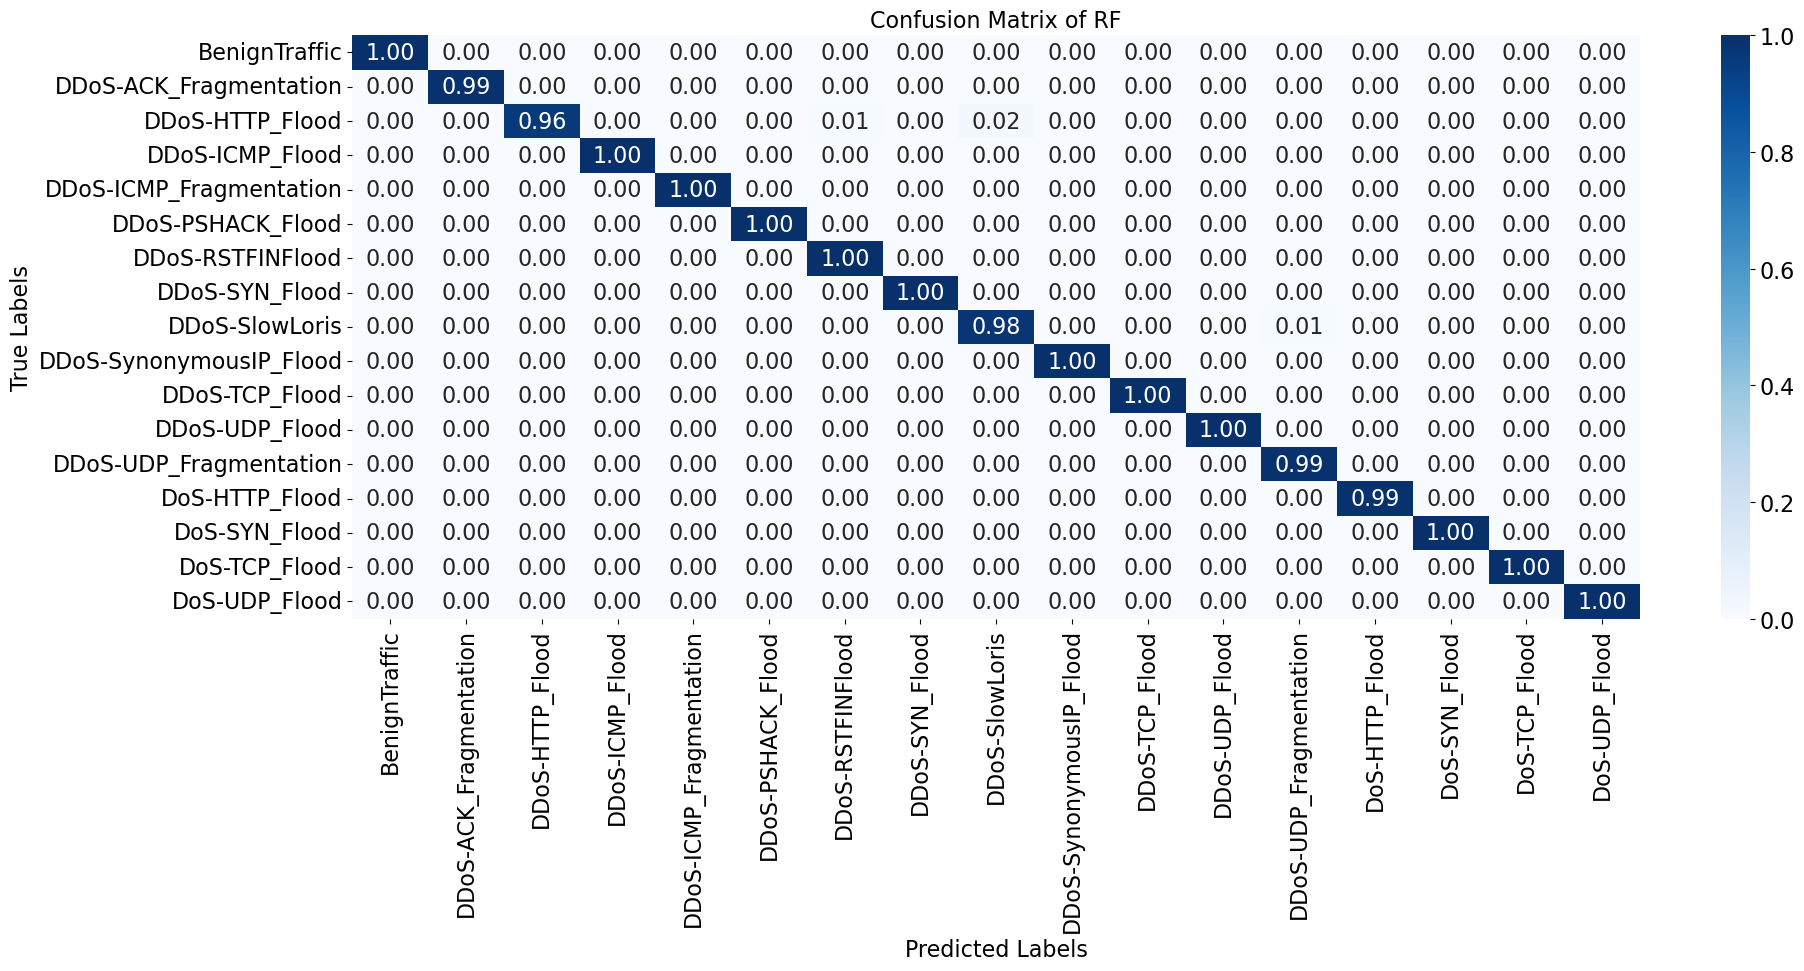

100%|██████████| 17/17 [00:17<00:00,  1.03s/it]


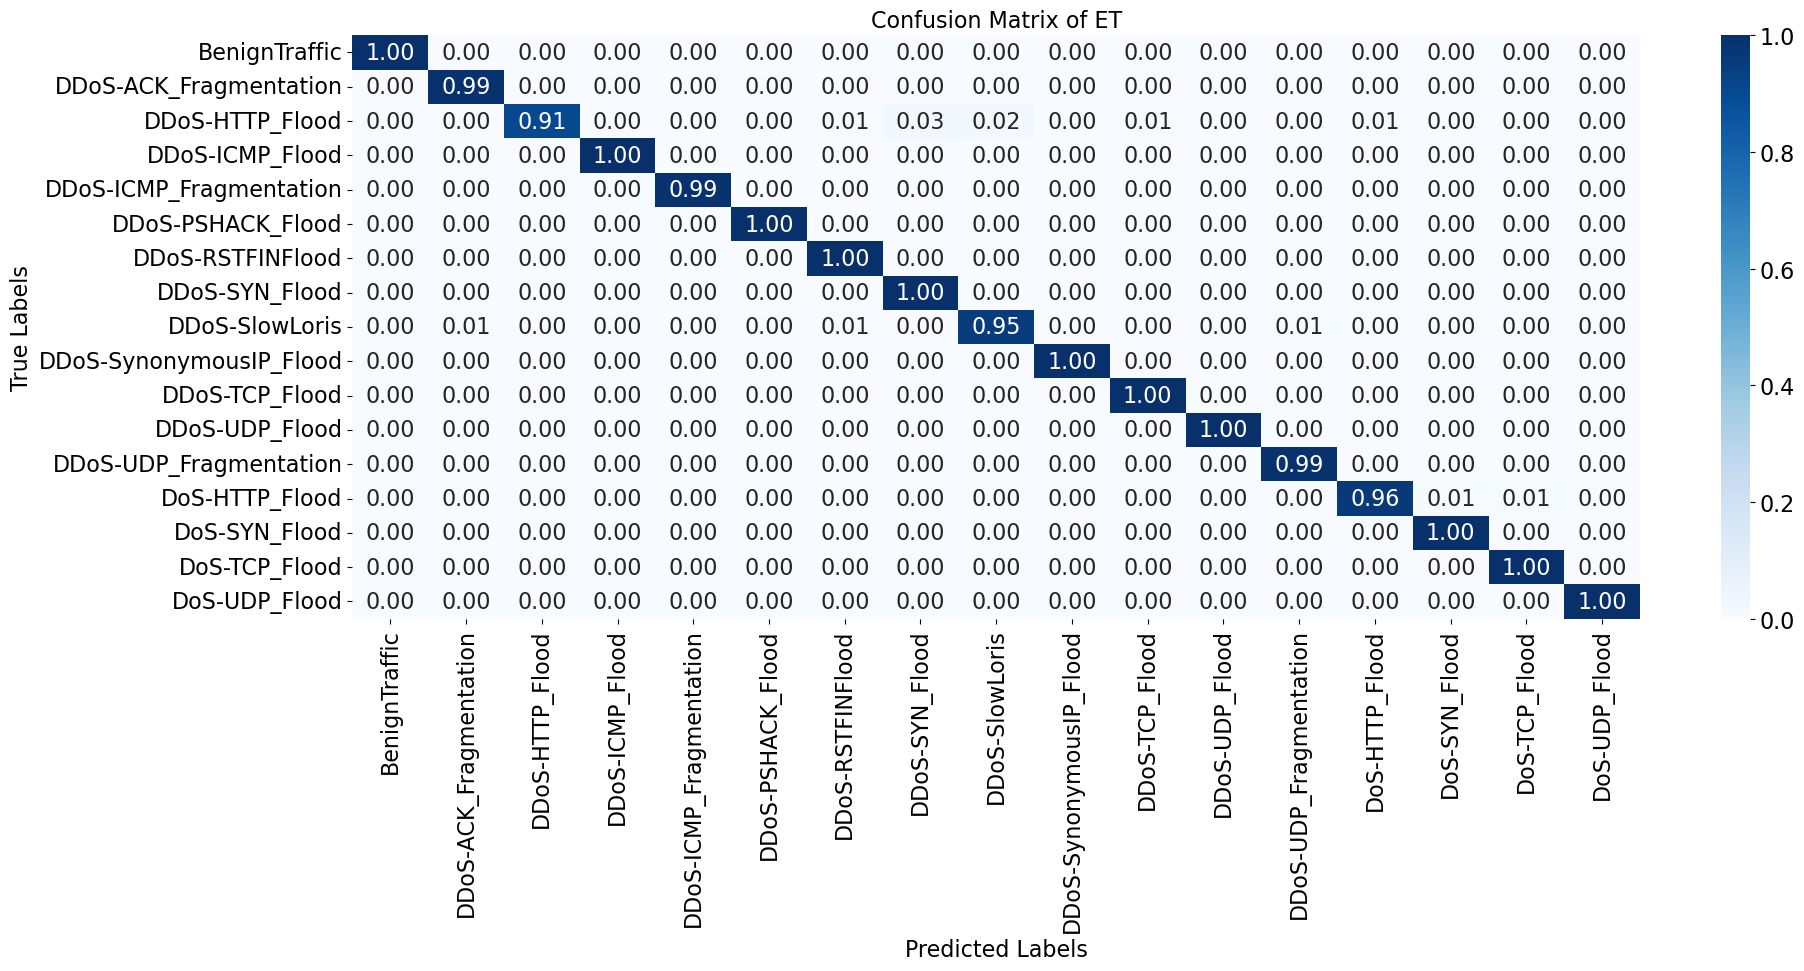

100%|██████████| 17/17 [00:17<00:00,  1.06s/it]


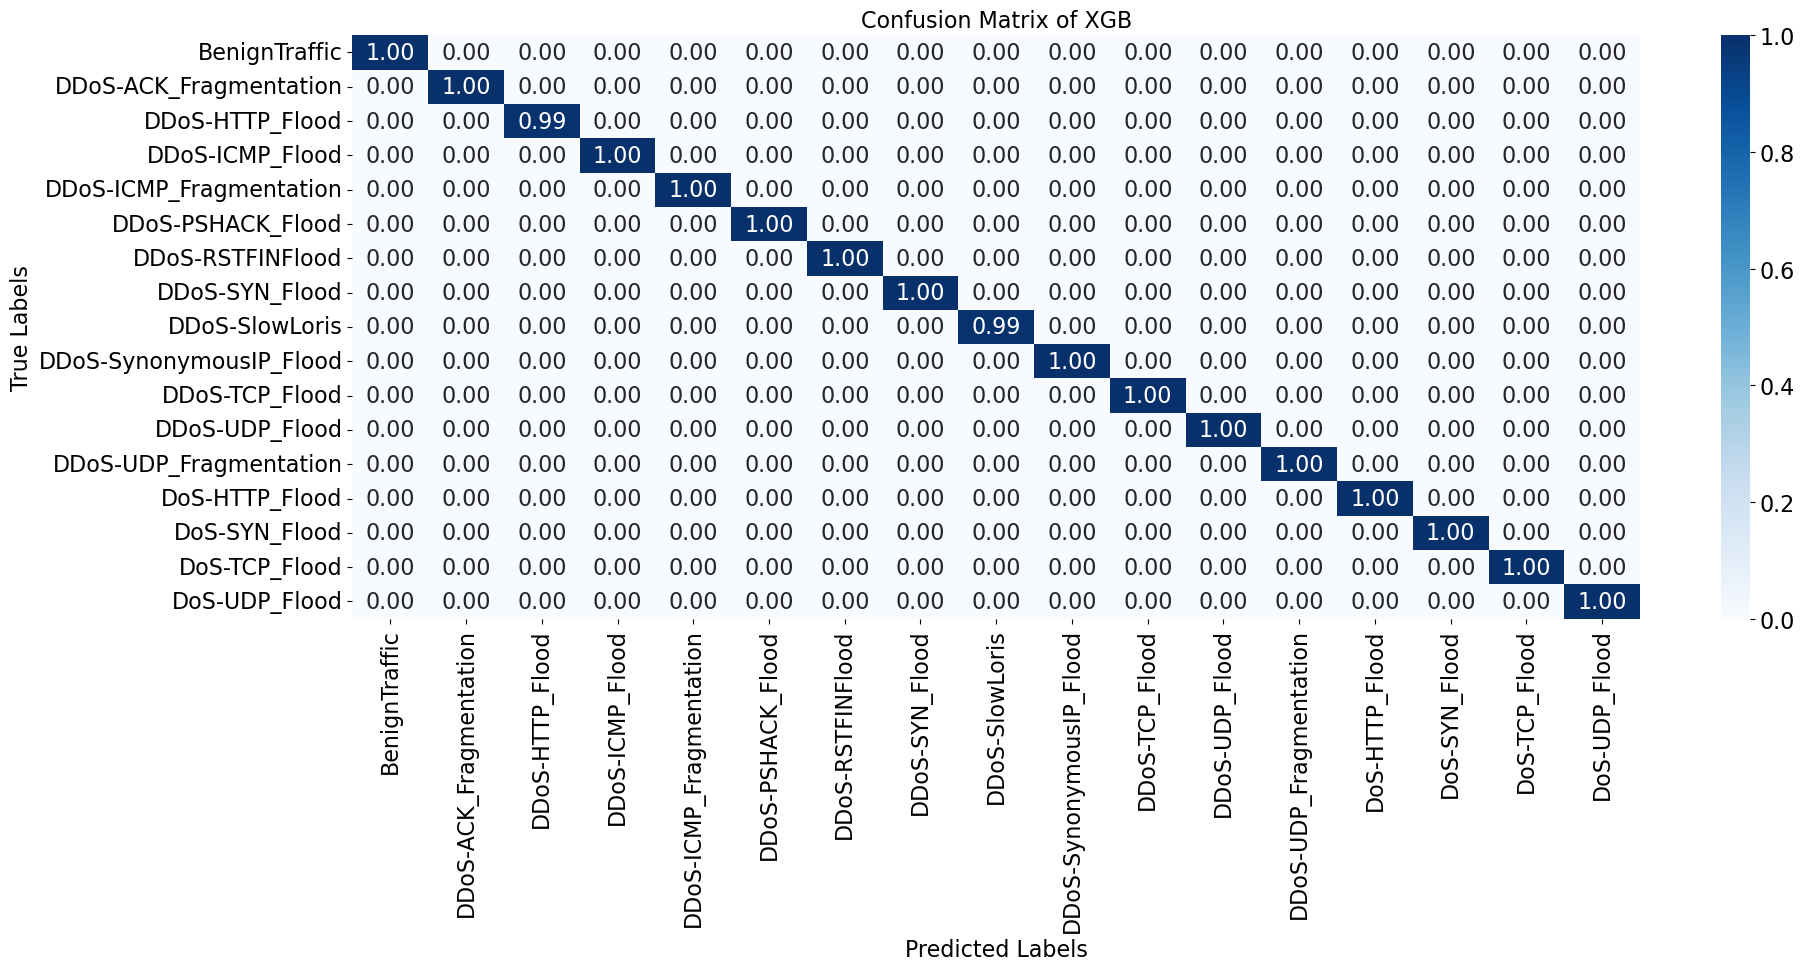

100%|██████████| 4/4 [1:47:36<00:00, 1614.02s/it]


['.\\DoS_system\\encoder.joblib']

In [23]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_repo)
performance = get_or_define_performance_df(model_repo, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_repo+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))
print(selected_X)

# selected_X = X_columns

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (20, 10)
saveConfusionMatrix = True
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'Selected Features '+model['Name'], train_sets, test_sets, file_path, performance, model_repo+'Selected Features ', X_columns=selected_X, y_column=y_column, encoder=encoder, scaler=scaler, \
                                                     confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_repo+'Selected Features '+model['Name'], figsize=figsizeConfusionMatrix, modelLabel=model['Name'])

    # Save performance
    performance.to_csv(model_repo + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_repo+'encoder.joblib')

## Select features

In [18]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_repo+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_repo+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_repo+'model_XGB.joblib')
    },
    {
        "Name": "ET",
        "Model": joblib.load(model_repo+'model_ET.joblib')
    },
]

100%|██████████| 4/4 [00:00<00:00, 38.20it/s]


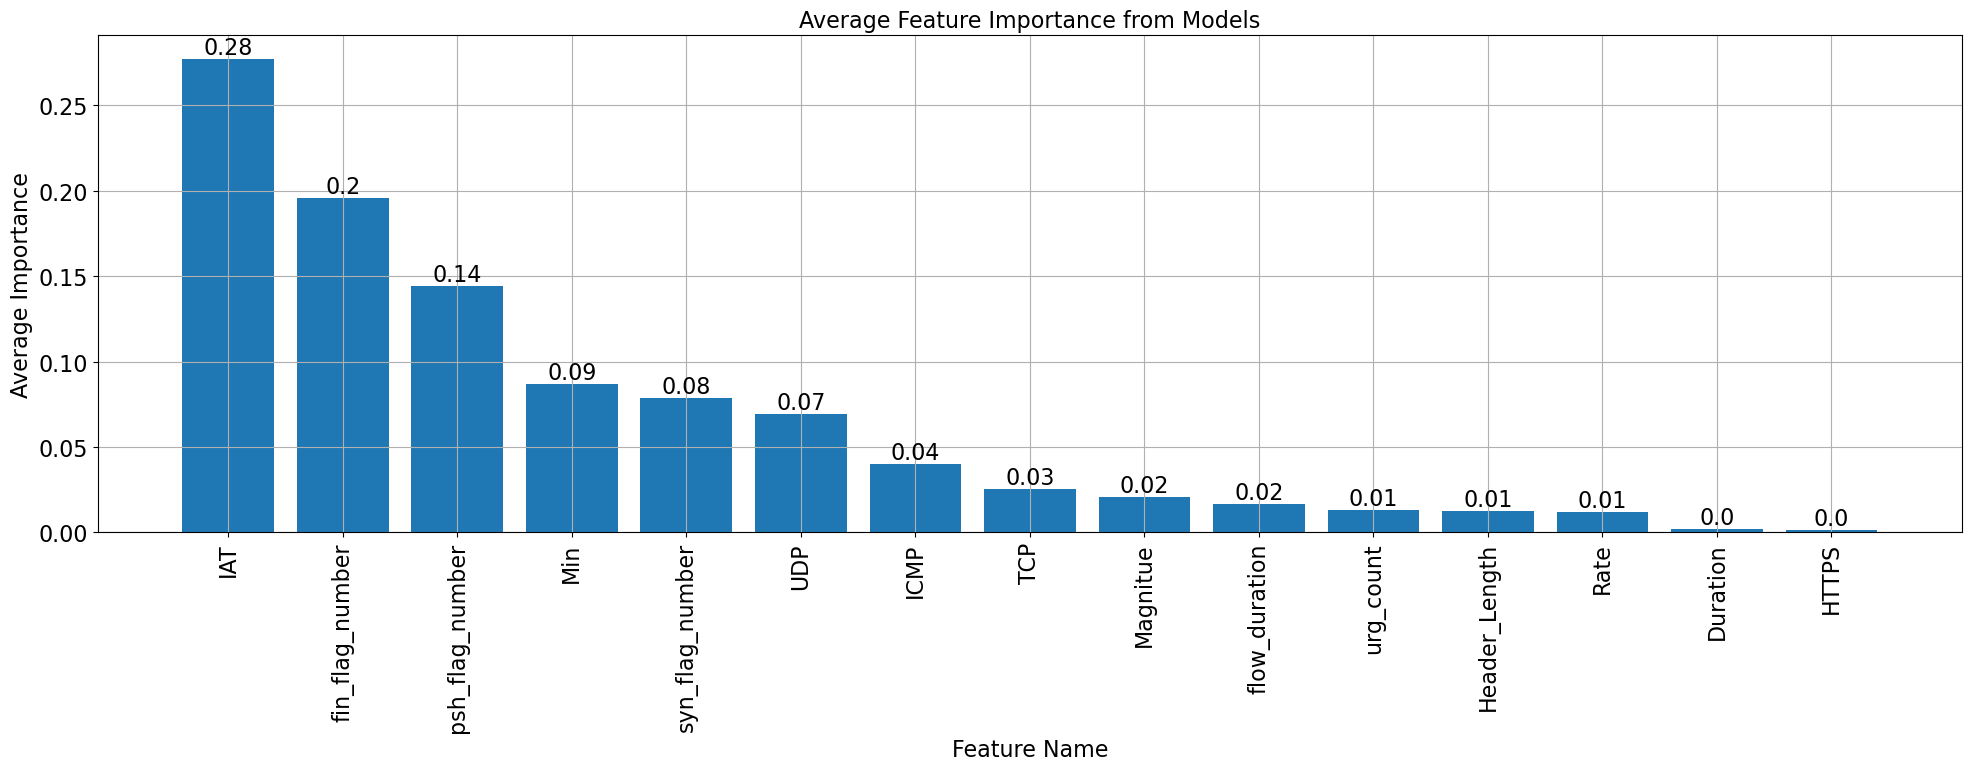

            Feature  Average Importance
0               IAT            0.277066
1   fin_flag_number            0.195608
2   psh_flag_number            0.144479
3               Min            0.087151
4   syn_flag_number            0.078888
5               UDP            0.069543
6              ICMP            0.040276
7               TCP            0.025202
8          Magnitue            0.020766
9     flow_duration            0.016736
10        urg_count            0.012866
11    Header_Length            0.012854
12             Rate            0.012063
13         Duration            0.002257
14            HTTPS            0.001508
15       Covariance            0.001492
16             HTTP            0.001237
17            Drate            0.000005
18              DNS            0.000003
19              LLC            0.000002
20             DHCP            0.000000
[0.27706567 0.47267329 0.61715191 0.70430311 0.78319063 0.85273393
 0.8930102  0.9182119  0.93897811 0.95571447 0.968580

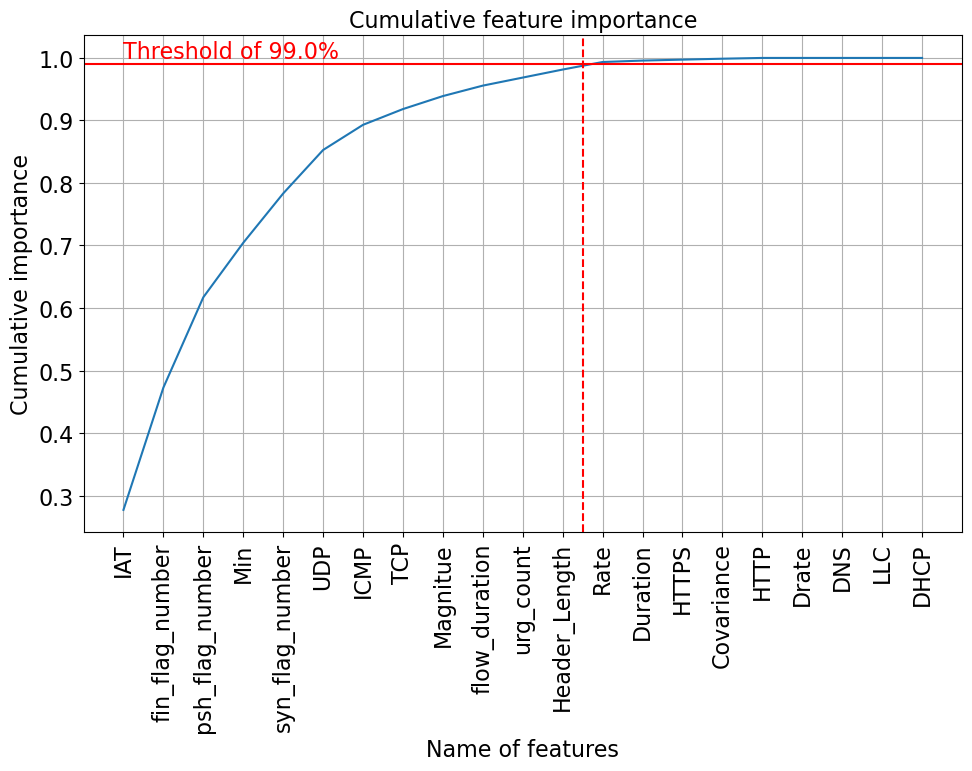

            Feature  Average Importance
0               IAT            0.226909
1   fin_flag_number            0.160197
2   psh_flag_number            0.118324
3               Min            0.071374
4   syn_flag_number            0.064607
5               UDP            0.056954
7              ICMP            0.032985
9               TCP            0.020639
10         Magnitue            0.017007
13    flow_duration            0.013707
17        urg_count            0.010537
18    Header_Length            0.010527


100%|██████████| 95/95 [01:56<00:00,  1.23s/it]


In [20]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_repo, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_repo+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\DoS\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_repo+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(read_csv_file(train_sets[0], file_path)[X_columns], average_importance_df, model_repo, figsize=(20, 8), threshold=threshold)
print(features_with_threshold_corr.head(features_with_threshold_corr.size))

selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_repo, threshold_percentage=0.99)
pd.DataFrame(selected_X).to_csv(model_repo+'selected_X_columns.csv', index=False)
# print(selected_X)

filtered_df = average_importance_df[average_importance_df['Feature'].isin(selected_X)]
print(filtered_df.head(filtered_df.size))

# Define and fit scaler
scaler = MinMaxScaler()
for set in tqdm(build_sets + after_build_sets):
   scaler.fit(read_csv_file(set, file_path)[selected_X])

## Display Performance Metrics

In [13]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_repo)
performance = performance.drop(3).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

# performance.head()
performance.to_csv(model_repo + performance_path, index=False)

In [24]:
read_csv_file(performance_path, model_repo).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
7,Selected Features XGB,0.999999,0.999999,0.999999,0.999999,0.999850,0.998786,0.998631,0.998708,0.000060,0.000090,443,668,7389386
2,XGB,1.000000,1.000000,1.000000,1.000000,0.999843,0.997992,0.998277,0.998131,0.000065,0.000092,483,679,7389386
4,Selected Features DT,0.999998,0.999998,0.999999,0.999998,0.999668,0.997070,0.995621,0.996330,0.000166,0.000166,1225,1229,7389386
0,DT,1.000000,1.000000,1.000000,1.000000,0.999614,0.992832,0.993618,0.993204,0.000199,0.000186,1474,1378,7389386
5,Selected Features RF,0.999997,0.999997,0.999998,0.999998,0.999359,0.994306,0.987797,0.990960,0.000296,0.000346,2185,2554,7389386
3,RF,0.999984,0.999980,0.999990,0.999985,0.999090,0.992738,0.987583,0.989913,0.000453,0.000456,3350,3372,7389386
6,Selected Features ET,0.999998,0.999998,0.999999,0.999998,0.998594,0.987531,0.976218,0.981467,0.000804,0.000602,5939,4447,7389386
1,ET,1.000000,1.000000,1.000000,1.000000,0.997425,0.981295,0.974822,0.977235,0.001326,0.001249,9797,9232,7389386


In [25]:
from select_best_feature_combination import *

# Initial setup and loading the dataset
dataset = read_csv_file(train_sets[0], file_path)
# for file in train_sets[1:1]:
#     dataset = pd.concat([dataset, read_csv_file(file, file_path)], ignore_index=True)
dataset.sample(10000, random_state=42).reset_index(drop=True)

corr_max = 0.8
final_features_df = pd.DataFrame(columns=['Model', 'Num_Features', 'Optimal_Features_Count', 'Optimal_Feature'])
y_column = 'label'


from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Data Preprocessing
# Separate features (X) and target variable (y)
# Choose X with selected X

# print(type(dataset))
# dataset = multi_filter_df(dataset, filter_cols, filter_name)
# print(dataset.head(20))

X = dataset[selected_X]
y = dataset[y_column]

# Apply MinMax scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the first few rows of the scaled features and encoded target variable to verify the transformation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_encoded_df = pd.Series(y_encoded, name='Binary_Encoded')

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.3, random_state=42)
print(X_train.columns)

# Define figure and axes according to the number of models
# fig, axs = plt.subplots(len(models), 2, figsize=(20, 6 * len(models)))

Index(['IAT', 'fin_flag_number', 'psh_flag_number', 'Min', 'syn_flag_number',
       'UDP', 'ICMP', 'TCP', 'Magnitue', 'flow_duration', 'urg_count',
       'Header_Length'],
      dtype='object')


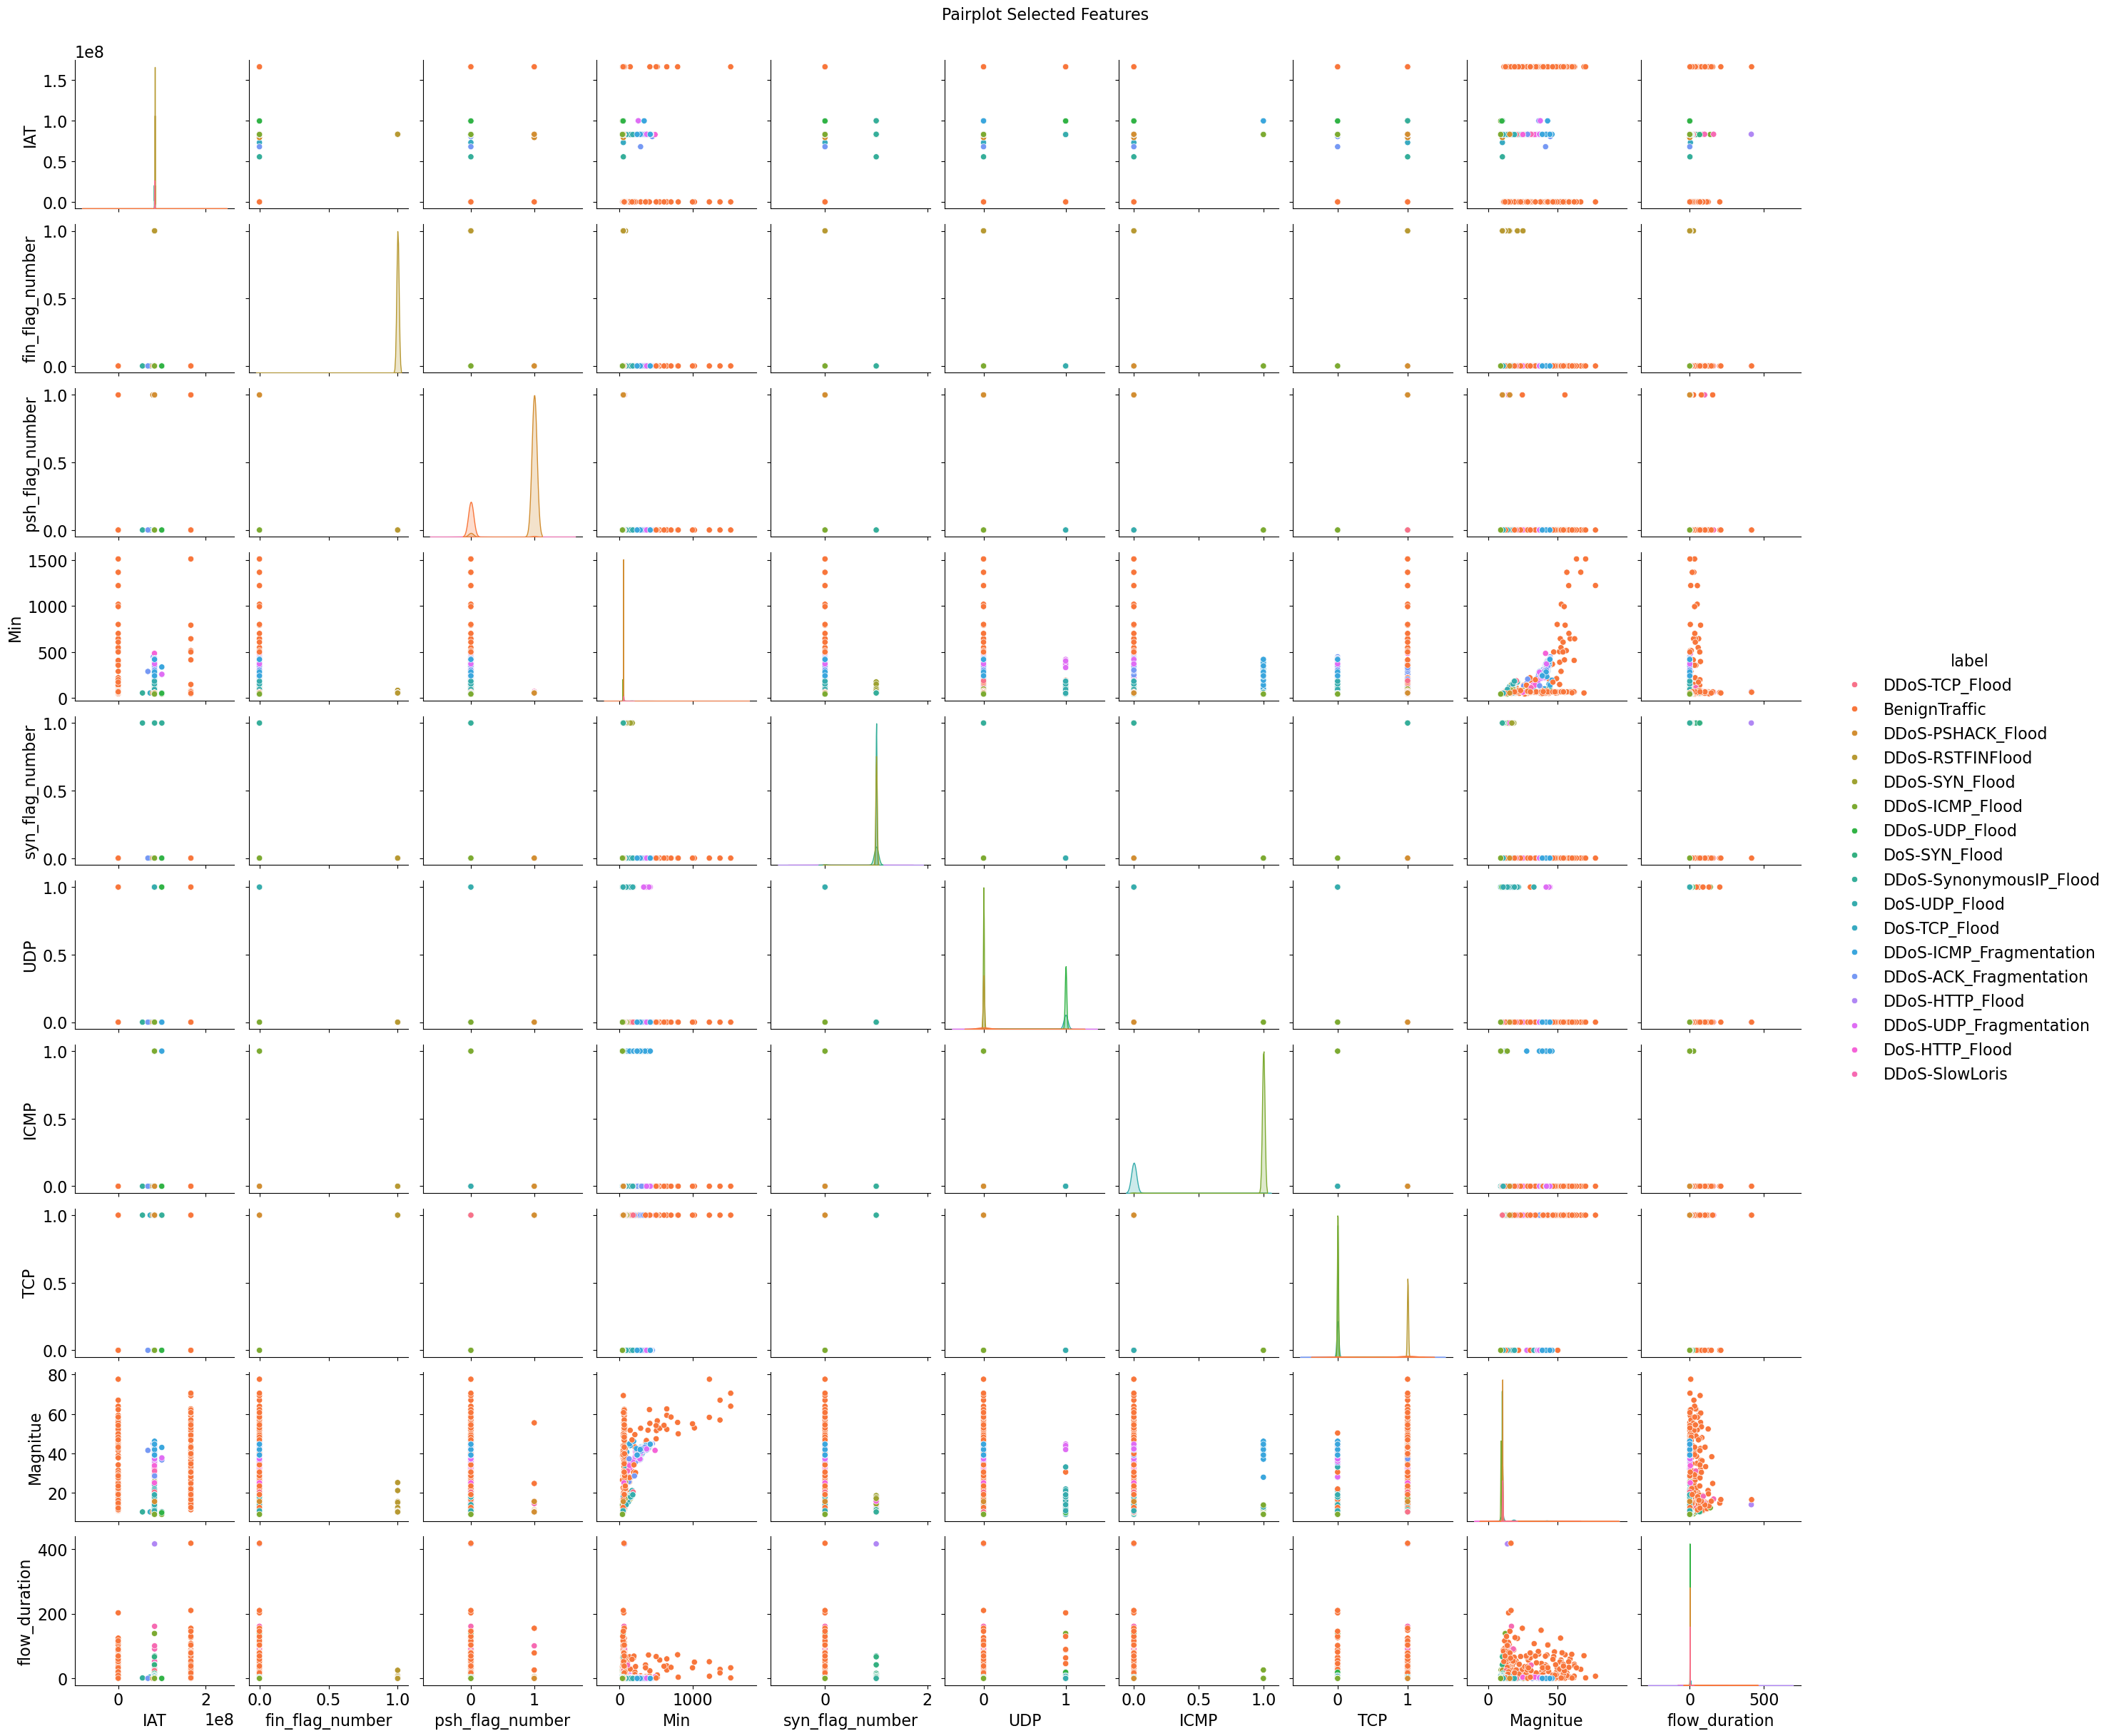

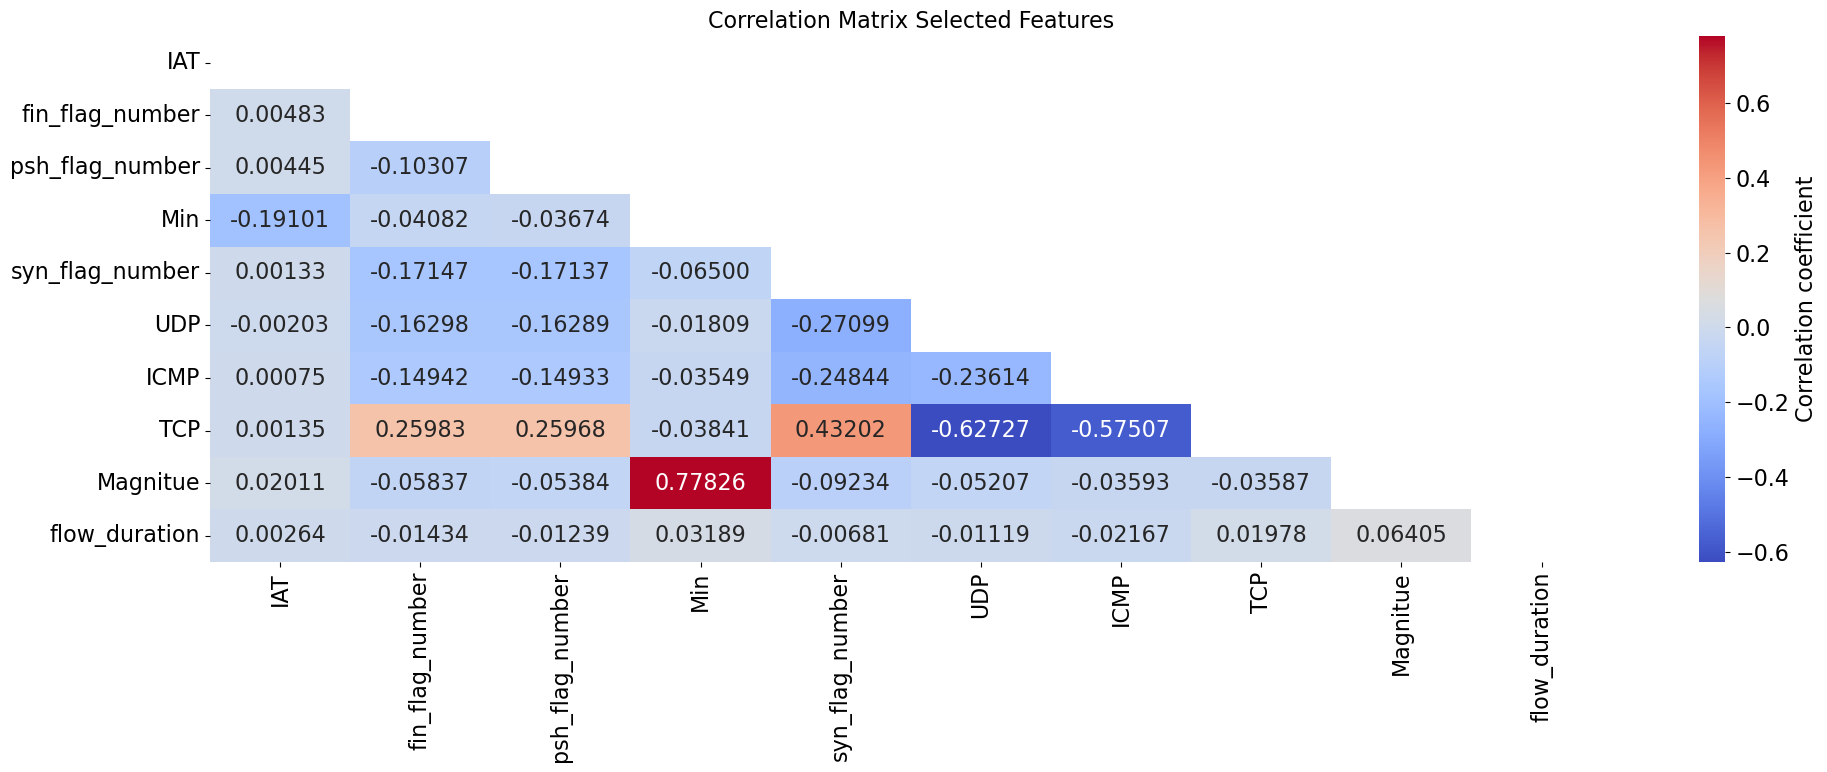

                IAT  fin_flag_number  psh_flag_number           Min  \
count  1.000000e+04     10000.000000     10000.000000  10000.000000   
mean   8.303039e+07         0.093800         0.093900     62.445844   
std    1.304690e+07         0.291565         0.291704     62.380368   
min    6.799698e-05         0.000000         0.000000     42.000000   
25%    8.306827e+07         0.000000         0.000000     50.000000   
50%    8.312358e+07         0.000000         0.000000     54.000000   
75%    8.333113e+07         0.000000         0.000000     54.000000   
max    1.665264e+08         1.000000         1.000000   1514.000000   

       syn_flag_number           UDP          ICMP           TCP  \
count     10000.000000  10000.000000  10000.000000  10000.000000   
mean          0.222600      0.200500      0.175300      0.608300   
std           0.416013      0.400395      0.380243      0.488155   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.0000

In [26]:
if len(selected_X) > 10:
    new_selected_X = selected_X[:10]
else:
    new_selected_X = selected_X
    
new_selected_X.extend([y_column])

dataset = read_csv_file(train_sets[0], file_path)[new_selected_X].sample(10000, random_state=42).reset_index(drop=True)
# dataset = multi_filter_df(dataset, filter_cols, filter_name)

    
# Pairplot of selected features
pairplot = sns.pairplot(dataset, hue=y_column)
pairplot.figure.suptitle('Pairplot Selected Features')  # y=1.02 to move the title above the plot
pairplot.figure.set_size_inches(30, 25)
pairplot.figure.subplots_adjust(top=0.95)  # Adjust the top to make space for the title

pairplot.savefig(model_repo+'Pairplot_selectedFeatures.png')
plt.show()

# Lower correlation matrix of selected features
corr = read_csv_file(train_sets[0], file_path)[new_selected_X].reset_index(drop=True).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, fmt=".5f", mask=mask, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix Selected Features')
plt.tight_layout()
plt.savefig(model_repo+'CorrelationMatrix_selectedFeatures.png')
plt.show()

# Describe on selected features and first set, then save describe to a file
print(dataset.describe())
dataset.describe().to_csv(model_repo+'describe.csv', index=False)